In [1]:
import pandas as pd
import numpy as np

In [2]:
#train = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_train.csv') #original table
#test = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_test.csv')  # original table
train = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/strain.csv') # modify table from sql
test = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/stest.csv') # modify table from sql 
game = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_games.csv')
turns = pd.read_csv('C:/Users/ankro/OneDrive/Desktop/player_turns.csv')
pd.set_option('display.max_columns',None)

# Exploratory  Data Analysis

In [3]:
train.sample(10)
#turns.sample(10)
#game.sample(10)

,game_id,Bot_name,Bot_score,Bot_rating,player_name,player_score,player_rating
8254,11857,HastyBot,386,1640,BB-8,351.0,1500
27340,39439,STEEBot,448,2112,Glilac,391.0,2070
40996,59189,BetterBot,388,1991,Banul07,414.0,1766
39017,56345,HastyBot,438,2132,thraoph,391.0,2062
15369,22138,STEEBot,464,1867,Willeford,346.0,1836
9799,14119,STEEBot,441,2091,Rexington,461.0,2042
35841,51775,STEEBot,447,2218,UcheVictor,406.0,1922
36247,52373,BetterBot,318,1871,Knight2014,381.0,1844
15882,22871,STEEBot,348,1862,talulah,274.0,1617
26120,37669,BetterBot,367,2004,Modupe,412.0,1901


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50420 entries, 0 to 50419
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        50420 non-null  int64  
 1   Bot_name       50420 non-null  object 
 2   Bot_score      50420 non-null  int64  
 3   Bot_rating     50420 non-null  int64  
 4   player_name    50420 non-null  object 
 5   player_score   50419 non-null  float64
 6   player_rating  50420 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.7+ MB


In [5]:
train.describe()

,game_id,Bot_score,Bot_rating,player_score,player_rating
count,50420.000000,50420.000000,50420.000000,50419.000000,50420.000000
mean,36365.899147,421.957438,1960.810809,376.101589,1790.409163
std,21019.501457,70.475216,200.434698,72.746498,229.722334
min,1.000000,162.000000,1349.000000,0.000000,1033.000000
25%,18141.250000,373.000000,1827.000000,331.000000,1582.000000
50%,36337.500000,417.000000,1991.000000,378.000000,1818.000000
75%,54622.250000,465.000000,2124.000000,423.000000,1982.000000
max,72773.000000,1132.000000,2377.000000,707.000000,2510.000000


In [6]:
train.describe(include=['object'])

,Bot_name,player_name
count,50420,50420
unique,4,1029
top,HastyBot,BB-8
freq,17346,6576


In [7]:
train.isnull().sum()

game_id          0
Bot_name         0
Bot_score        0
Bot_rating       0
player_name      0
player_score     1
player_rating    0
dtype: int64

In [8]:
train.duplicated().sum()

0

In [9]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB


In [10]:
game.describe()

,game_id,winner,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds
count,72773.000000,72773.000000,72773.000000,72773.00000,72773.000000,72773.000000
mean,36387.000000,0.350734,1198.034230,0.22856,2.143707,484.069347
std,21007.899907,0.484859,713.185219,2.54802,2.989853,333.563128
min,1.000000,-1.000000,15.000000,0.00000,0.000000,7.962989
25%,18194.000000,0.000000,900.000000,0.00000,1.000000,250.172459
50%,36387.000000,0.000000,1200.000000,0.00000,1.000000,399.834150
75%,54580.000000,1.000000,1200.000000,0.00000,1.000000,633.424285
max,72773.000000,1.000000,3600.000000,60.00000,10.000000,4444.821645


In [11]:
game.describe(include=['object'])

,first,time_control_name,game_end_reason,created_at,lexicon,rating_mode
count,72773,72773,72773,72773,72773,72773
unique,1314,4,4,72194,4,2
top,STEEBot,regular,STANDARD,2022-09-20 15:59:19,CSW21,RATED
freq,12210,60282,67987,3,44594,54076


In [12]:
game.isnull().sum()

game_id                  0
first                    0
time_control_name        0
game_end_reason          0
winner                   0
created_at               0
lexicon                  0
initial_time_seconds     0
increment_seconds        0
rating_mode              0
max_overtime_minutes     0
game_duration_seconds    0
dtype: int64

In [13]:
game.duplicated().sum()

0

In [14]:
turns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB


In [15]:
turns.describe()

,game_id,turn_number,points,score
count,2.005498e+06,2.005498e+06,2.005498e+06,2.005498e+06
mean,3.640032e+04,1.453798e+01,2.900326e+01,2.270914e+02
std,2.100559e+04,8.434285e+00,2.210145e+01,1.343110e+02
min,1.000000e+00,1.000000e+00,-2.210000e+02,-6.400000e+01
25%,1.820800e+04,7.000000e+00,1.600000e+01,1.130000e+02
50%,3.640100e+04,1.400000e+01,2.400000e+01,2.240000e+02
75%,5.460900e+04,2.100000e+01,3.600000e+01,3.320000e+02
max,7.277300e+04,7.500000e+01,3.110000e+02,1.171000e+03


In [16]:
turns.describe(include=['object'])

,nickname,rack,location,move,turn_type
count,2005498,1936108,1873259,2005044,2005103
unique,1471,626752,418,356847,7
top,BetterBot,I,15A,--,Play
freq,360931,2900,24190,14302,1872864


In [17]:
turns.isnull().sum()

game_id             0
turn_number         0
nickname            0
rack            69390
location       132239
move              454
points              0
score               0
turn_type         395
dtype: int64

In [18]:
turns.duplicated().sum()

0

Panda profiling provide an overview of the dataset by providing univariant describtion and information of each feature along with correlation with other feature in dataset

In [19]:
# from pandas_profiling import ProfileReport

In [20]:
# prof = ProfileReport(turns) # game # turns #train
# prof.to_file(output_file= "C:/Users/ankro/OneDrive/Desktop/turn EDA.html") # game # turns #train

# Overall Data Frame work

After going through the data few point is clear that the turn and game table contain both the data from train and test player. Hence we need to segregrate them so that in model training it will not cause problem

In [21]:
# df= pd.merge(train,train,how='inner',left_on =['game_id'],right_on=['game_id'])
# dele=df.loc[df['nickname_x']==df['nickname_y']].index
# df.drop(dele,inplace=True,axis=0)
# print('training dataset =',df.shape)
# df.drop_duplicates(subset=['game_id'], keep='first', inplace=True)

In [22]:
# df_1= pd.merge(test,test,how='inner',left_on =['game_id'],right_on=['game_id'])
# dele=df_1.loc[df_1['nickname_x']==df_1['nickname_y']].index
# df_1.drop(dele,inplace=True,axis=0)
# print('test dataset =',df_1.shape)
# df_1.drop_duplicates(subset=['game_id'], keep='first', inplace=True)

In [23]:
df= pd.merge(train,game,how='left',left_on =['game_id'],right_on=['game_id'])
df.rename(columns = {'winner':'first_move_win/not','first':'first_move_by'}, inplace = True)

In [24]:
df_1= pd.merge(test,game,how='left',left_on =['game_id'],right_on=['game_id'])
df_1.rename(columns = {'winner':'first_move_win/not','first':'first_move_by'}, inplace = True)

In [25]:
train_df = pd.merge(df,turns,how='left',left_on =['game_id'],right_on=['game_id'])
train_df.shape

(1391588, 26)

In [26]:
test_df = pd.merge(df_1,turns,how='left',left_on =['game_id'],right_on=['game_id'])
test_df.shape

(614312, 26)

In [ ]:
train_df['created_at']=pd.to_datetime(train_df['created_at'])
test_df['created_at']=pd.to_datetime(test_df['created_at'])

In [27]:
print('player in train dataframe =',len(train_df['game_id'].unique()),'player in train table =',len(train['game_id'].unique()))
train_df.sample(5)

player in train dataframe = 50410 player in train table = 50410


,game_id,Bot_name,Bot_score,Bot_rating,player_name,player_score,player_rating,first_move_by,time_control_name,game_end_reason,first_move_win/not,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname,rack,location,move,points,score,turn_type
856201,44756,BetterBot,377,1964,jadeite,387.0,1815,BetterBot,regular,STANDARD,1,2022-09-07 06:25:38,CSW21,1200,0,RATED,1,602.954137,17,BetterBot,CEEIIOR,G13,OI,13,215,Play
344617,17968,STEEBot,417,2144,Rexington,333.0,2058,STEEBot,regular,STANDARD,0,2022-09-20 16:27:31,CSW21,1200,0,RATED,1,1191.085716,6,Rexington,AEIMOUW,L8,.WAUM,29,122,Play
134936,7041,HastyBot,432,2213,AliSalman1,451.0,2102,AliSalman1,regular,STANDARD,1,2022-09-03 16:07:20,CSW21,900,0,RATED,1,343.016350,2,HastyBot,ADEMPVZ,I3,VAMPED,32,32,Play
679083,35427,HastyBot,351,1635,BB-8,384.0,1500,HastyBot,regular,STANDARD,1,2022-08-29 14:32:33,ECWL,900,0,CASUAL,10,257.095941,24,BB-8,CEIINOP,14H,.OP,26,365,Play
12880,705,BetterBot,376,1696,Kovert,396.0,1798,BetterBot,regular,STANDARD,1,2022-09-19 13:40:37,NWL20,1800,0,CASUAL,1,672.718861,9,BetterBot,?AEINQW,15H,sINEW,63,167,Play


In [28]:
print('player in test dataframe =',len(test_df['game_id'].unique()),'player in test table =',len(test['game_id'].unique()))
test_df.sample(5)

player in test dataframe = 22363 player in test table = 22363


,game_id,Bot_name,Bot_score,Bot_rating,player_name,player_score,player_rating,first_move_by,time_control_name,game_end_reason,first_move_win/not,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname,rack,location,move,points,score,turn_type
526418,62290,STEEBot,611,2142.0,hulkbuster,171,NaN,STEEBot,regular,STANDARD,0,2022-09-22 09:22:59,CSW21,1200,0,RATED,1,187.315152,29,STEEBot,ZENTVRN,NaN,(challenge),0,493,Challenge
325470,38663,BetterBot,385,1669.0,richardlauder,340,NaN,BetterBot,regular,STANDARD,0,2022-09-02 19:05:22,NWL20,3600,0,RATED,1,1134.104877,10,richardlauder,CDEEIOT,3C,C.TIE,16,167,Play
597063,70832,STEEBot,319,1911.0,hannahbanana,455,NaN,hannahbanana,rapid,STANDARD,1,2022-08-11 22:42:28,NWL20,720,0,RATED,1,448.547229,7,hannahbanana,EEILNTW,O8,WETL.,33,96,Play
122038,14572,STEEBot,387,1922.0,hannahbanana,300,NaN,hannahbanana,rapid,STANDARD,0,2022-08-31 17:07:57,NWL20,720,0,RATED,1,222.538271,23,hannahbanana,HINORSW,K1,WHO,21,219,Play
521065,61683,BetterBot,353,1953.0,DavidG,421,NaN,DavidG,regular,STANDARD,1,2022-08-28 21:32:48,CSW21,2400,0,RATED,1,705.266193,2,BetterBot,AEGIIOP,G5,PIE.OGI,12,12,Play


   # Feature Engineering

# Handling Missing Values

Finding all the missing data in the traina and test dataset

In [29]:
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()
missing_train = pd.DataFrame({'NaN_count_train': missing_train, 'NaN_percentage_train': missing_train / len(train_df)})
missing_test = pd.DataFrame({'NaN_count_test': missing_test, 'NaN_percentage_test': missing_test / len(test_df)})
missing=pd.concat([missing_train,missing_test],axis=1)
missing

,NaN_count_train,NaN_percentage_train,NaN_count_test,NaN_percentage_test
game_id,0,0.000000,0,0.000000
Bot_name,0,0.000000,0,0.000000
Bot_score,0,0.000000,0,0.000000
Bot_rating,0,0.000000,103,0.000168
player_name,0,0.000000,0,0.000000
player_score,29,0.000021,0,0.000000
player_rating,0,0.000000,614209,0.999832
first_move_by,0,0.000000,0,0.000000
time_control_name,0,0.000000,0,0.000000
game_end_reason,0,0.000000,0,0.000000


Filtering all columns name having missing values in train dataset

In [30]:
missing[missing['NaN_count_train']>0][['NaN_count_train','NaN_percentage_train']]

,NaN_count_train,NaN_percentage_train
player_score,29,0.000021
rack,48217,0.034649
location,88564,0.063642
move,295,0.000212
turn_type,253,0.000182


In [31]:
train_df.dropna(subset=['player_score'],inplace=True) # eleminating all the rows containing null in player_score columns

Finding the effect on the ratio of the catergory data if we remove all the null value in turn_type columns

In [32]:
ratio=pd.concat([
    train_df['turn_type'].value_counts()/len(train_df['turn_type'].dropna()),
    train_df['turn_type'].value_counts(dropna=False)/len(train_df['turn_type'])
    ],axis=1)
print(ratio)

               turn_type  turn_type
Play            0.936349   0.936179
End             0.034287   0.034281
Exchange        0.023764   0.023760
Pass            0.003576   0.003576
Timeout         0.001423   0.001423
Challenge       0.000337   0.000337
Six-Zero Rule   0.000263   0.000263
NaN                  NaN   0.000182


<AxesSubplot:>

<Figure size 72x216 with 0 Axes>

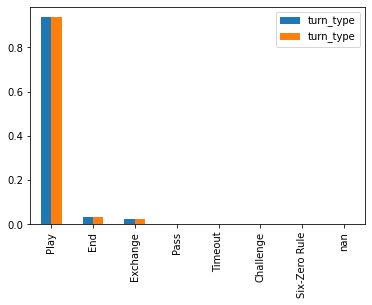

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1,3))
ratio.plot(kind='bar')

The amount of missing data in turn_type is less than 1 % and also if we remove the all null value the ratio of the dataset
is not affected so we will remove the rows having null value

In [34]:
# turns.dropna(subset=['turn_type'],inplace=True)# elemination the row having null value in turn_type columns

# Handeling Category Data

As we know in scabble game there are various words which can be formed during the game in progress so we need a certain parameter to measure all this

In [35]:
train_df['rack']= train_df['rack'].str.len()
train_df['move']= train_df['move'].str.len()

In [36]:
train_df.describe(include=['object'])

,Bot_name,player_name,first_move_by,time_control_name,game_end_reason,created_at,lexicon,rating_mode,nickname,location,turn_type
count,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1391559,1303001,1391306
unique,4,1029,915,4,4,50124,4,2,1031,418,7
top,BetterBot,BB-8,BetterBot,regular,STANDARD,2022-07-29 08:34:08,CSW21,RATED,BetterBot,15A,Play
freq,494744,185590,246528,1197140,1321804,74,837601,985814,247412,16788,1302748


In [37]:
train_df[['time_control_name','game_end_reason','lexicon','rating_mode']] #excluding turn_type bcz it contain nulls

,time_control_name,game_end_reason,lexicon,rating_mode
0,regular,STANDARD,NWL20,CASUAL
1,regular,STANDARD,NWL20,CASUAL
2,regular,STANDARD,NWL20,CASUAL
3,regular,STANDARD,NWL20,CASUAL
4,regular,STANDARD,NWL20,CASUAL
...,...,...,...,...
1391583,regular,STANDARD,CSW21,RATED
1391584,regular,STANDARD,CSW21,RATED
1391585,regular,STANDARD,CSW21,RATED
1391586,regular,STANDARD,CSW21,RATED


 using ordinal encoder to encode the category columns

In [38]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
train_df[['time_control_name','game_end_reason','lexicon','rating_mode']] = oe.fit_transform(train_df[['time_control_name','game_end_reason','lexicon','rating_mode']])

As we know that total block in scrabble game is of 15X15 so converting in terms of x and y axis

In [39]:
train_df['location_y'] = train_df["location"].str.extract('(\d+)')
train_df['location_y'] = pd.to_numeric(train_df['location_y'])
train_df['location_x'] = train_df["location"].str.extract('([A-Z])')
# cann't apply Ordinal encoder bcz having null use so using replace
train_df['location_x'].replace(to_replace=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'],
                            value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace=True)
train_df.drop(columns='location',axis=1,inplace=True)

In [40]:
# cann't apply Ordinal encoder bcz having null use so using replace
train_df['turn_type'].replace(to_replace=['Play', 'End', 'Exchange', 'Pass', 'Timeout', 'Six-Zero Rule','Challenge'],
                             value = [1,2,3,4,5,6,7],inplace=True)

move in scrabble game is define as the what letter you put on board so if player don't play that mean zero word placed

In [44]:
train_df['move'].fillna(value=0,inplace=True)

Turn_type in scrabble game is what turn player made like play / pass / timeout .so if null  present mean player didn't make any move thus sount as zero or Timeout

In [45]:
train_df['turn_type'].fillna(value=0,inplace=True)

Rack in scrabbler game is collection of random alphabets from which we have to select and place on board to make a meaningfull word. so when rack is null which mean the player has succesfully placed all alphabets on board. so here we will count null as zero

In [46]:
train_df['rack'].fillna(value=0,inplace=True)

In [66]:
train_df.sample(10)

,game_id,Bot_name,Bot_score,Bot_rating,player_name,player_score,player_rating,first_move_by,time_control_name,game_end_reason,first_move_win/not,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds,turn_number,nickname,rack,move,points,score,turn_type,location_y,location_x
768382,40129,STEEBot,467,1835,Kakapo,405.0,1963,Kakapo,2.0,2.0,0,2022-08-13 01:02:35,3.0,900,0,1.0,1,144.346222,14,STEEBot,7.0,3.0,22,242,1.0,10.0,8.0
498351,26020,STEEBot,379,2155,DDarien,387.0,1875,STEEBot,2.0,2.0,1,2022-09-19 09:26:42,0.0,3600,0,0.0,5,909.233441,20,DDarien,7.0,4.0,21,305,1.0,12.0,15.0
80254,4214,STEEBot,595,2086,5k2smart,109.0,1431,STEEBot,2.0,2.0,0,2022-07-28 04:21:53,0.0,1200,10,0.0,0,342.714453,10,5k2smart,7.0,3.0,3,29,1.0,9.0,5.0
174619,9108,HastyBot,428,1649,BB-8,438.0,1500,BB-8,2.0,2.0,1,2022-09-04 13:50:14,1.0,900,0,0.0,10,214.672950,17,BB-8,7.0,4.0,31,291,1.0,11.0,3.0
1239014,64792,STEEBot,533,1795,Mollygardner,299.0,1517,STEEBot,2.0,2.0,0,2022-09-10 03:58:40,3.0,1200,0,1.0,1,442.563468,2,Mollygardner,7.0,4.0,14,14,1.0,8.0,5.0
1181232,61808,BetterBot,323,2028,huimin,345.0,1895,huimin,2.0,0.0,1,2022-08-06 10:38:07,0.0,1200,0,1.0,1,1114.603718,27,huimin,7.0,5.0,26,344,1.0,11.0,12.0
1142768,59791,BetterBot,314,2026,ChsrQat,371.0,2057,ChsrQat,2.0,2.0,1,2022-09-05 01:40:53,0.0,900,0,1.0,1,553.637750,6,BetterBot,7.0,2.0,10,48,1.0,7.0,8.0
1139225,59599,BetterBot,413,2000,Zynx,296.0,1836,Zynx,1.0,2.0,0,2022-09-05 15:51:06,0.0,780,0,1.0,1,346.235215,26,BetterBot,7.0,7.0,28,390,1.0,1.0,3.0
889017,46472,HastyBot,360,1614,BB-8,367.0,1500,BB-8,2.0,2.0,1,2022-09-19 02:54:24,1.0,900,0,0.0,10,194.253262,24,HastyBot,5.0,4.0,9,360,1.0,6.0,15.0
1000417,52401,HastyBot,305,1640,BB-8,471.0,1500,BB-8,2.0,2.0,1,2022-09-01 03:01:33,1.0,900,0,0.0,10,159.747140,13,BB-8,7.0,5.0,34,311,1.0,2.0,10.0


# Feature selection / Feature construction / modeling .. IN Progresss 